In [1]:
import yfinance as yf
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [2]:
vgt = yf.Ticker("VGT")

In [3]:
vgt = vgt.history(period="max")

In [4]:
vgt

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2004-01-30 00:00:00-05:00,41.458634,41.883938,41.458634,41.747841,117600,0.0,0.0,0.0
2004-02-02 00:00:00-05:00,41.764848,41.781860,41.543691,41.781860,65400,0.0,0.0,0.0
2004-02-03 00:00:00-05:00,41.509660,41.526672,41.356550,41.526672,231100,0.0,0.0,0.0
2004-02-04 00:00:00-05:00,40.403876,40.403876,40.276283,40.276283,51000,0.0,0.0,0.0
2004-02-05 00:00:00-05:00,40.573994,40.573994,40.276279,40.480427,2600,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-06-08 00:00:00-04:00,416.470001,421.140015,416.470001,420.429993,247700,0.0,0.0,0.0
2023-06-09 00:00:00-04:00,422.690002,426.519989,420.709991,422.179993,720000,0.0,0.0,0.0
2023-06-12 00:00:00-04:00,424.769989,431.049988,424.089996,430.989990,447400,0.0,0.0,0.0


In [5]:
vgt.index

DatetimeIndex(['2004-01-30 00:00:00-05:00', '2004-02-02 00:00:00-05:00',
               '2004-02-03 00:00:00-05:00', '2004-02-04 00:00:00-05:00',
               '2004-02-05 00:00:00-05:00', '2004-02-06 00:00:00-05:00',
               '2004-02-09 00:00:00-05:00', '2004-02-10 00:00:00-05:00',
               '2004-02-11 00:00:00-05:00', '2004-02-12 00:00:00-05:00',
               ...
               '2023-06-01 00:00:00-04:00', '2023-06-02 00:00:00-04:00',
               '2023-06-05 00:00:00-04:00', '2023-06-06 00:00:00-04:00',
               '2023-06-07 00:00:00-04:00', '2023-06-08 00:00:00-04:00',
               '2023-06-09 00:00:00-04:00', '2023-06-12 00:00:00-04:00',
               '2023-06-13 00:00:00-04:00', '2023-06-14 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=4877, freq=None)

<AxesSubplot:xlabel='Date'>

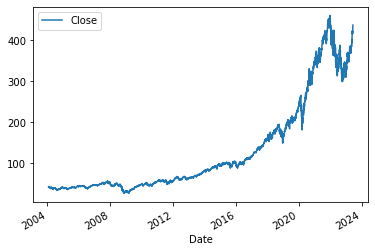

In [6]:
vgt.plot.line(y="Close", use_index=True)

In [7]:
vgt["Tomorrow"] = vgt["Close"].shift(-1)

In [8]:
vgt

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Tomorrow
Date,,,,,,,,,
2004-01-30 00:00:00-05:00,41.458634,41.883938,41.458634,41.747841,117600,0.0,0.0,0.0,41.781860
2004-02-02 00:00:00-05:00,41.764848,41.781860,41.543691,41.781860,65400,0.0,0.0,0.0,41.526672
2004-02-03 00:00:00-05:00,41.509660,41.526672,41.356550,41.526672,231100,0.0,0.0,0.0,40.276283
2004-02-04 00:00:00-05:00,40.403876,40.403876,40.276283,40.276283,51000,0.0,0.0,0.0,40.480427
2004-02-05 00:00:00-05:00,40.573994,40.573994,40.276279,40.480427,2600,0.0,0.0,0.0,41.297009
...,...,...,...,...,...,...,...,...,...
2023-06-08 00:00:00-04:00,416.470001,421.140015,416.470001,420.429993,247700,0.0,0.0,0.0,422.179993
2023-06-09 00:00:00-04:00,422.690002,426.519989,420.709991,422.179993,720000,0.0,0.0,0.0,430.989990
2023-06-12 00:00:00-04:00,424.769989,431.049988,424.089996,430.989990,447400,0.0,0.0,0.0,434.089996


In [9]:
vgt["Target"] = (vgt["Tomorrow"] > vgt["Close"]).astype(int)

In [10]:
vgt

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Tomorrow,Target
Date,,,,,,,,,,
2004-01-30 00:00:00-05:00,41.458634,41.883938,41.458634,41.747841,117600,0.0,0.0,0.0,41.781860,1
2004-02-02 00:00:00-05:00,41.764848,41.781860,41.543691,41.781860,65400,0.0,0.0,0.0,41.526672,0
2004-02-03 00:00:00-05:00,41.509660,41.526672,41.356550,41.526672,231100,0.0,0.0,0.0,40.276283,0
2004-02-04 00:00:00-05:00,40.403876,40.403876,40.276283,40.276283,51000,0.0,0.0,0.0,40.480427,1
2004-02-05 00:00:00-05:00,40.573994,40.573994,40.276279,40.480427,2600,0.0,0.0,0.0,41.297009,1
...,...,...,...,...,...,...,...,...,...,...
2023-06-08 00:00:00-04:00,416.470001,421.140015,416.470001,420.429993,247700,0.0,0.0,0.0,422.179993,1
2023-06-09 00:00:00-04:00,422.690002,426.519989,420.709991,422.179993,720000,0.0,0.0,0.0,430.989990,1
2023-06-12 00:00:00-04:00,424.769989,431.049988,424.089996,430.989990,447400,0.0,0.0,0.0,434.089996,1


In [11]:
vgt = vgt.loc["2017-01-01":].copy()

In [12]:
vgt

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Tomorrow,Target
Date,,,,,,,,,,
2017-01-03 00:00:00-05:00,114.743058,115.512453,114.217620,114.902565,435000,0.0,0.0,0.0,115.596893,1
2017-01-04 00:00:00-05:00,115.043308,115.765785,115.043308,115.596893,447600,0.0,0.0,0.0,115.681358,1
2017-01-05 00:00:00-05:00,115.446787,116.112969,115.287280,115.681358,579400,0.0,0.0,0.0,116.741608,1
2017-01-06 00:00:00-05:00,115.747026,116.994949,115.503070,116.741608,392000,0.0,0.0,0.0,116.948013,1
2017-01-09 00:00:00-05:00,116.863571,117.267034,116.779121,116.948013,321000,0.0,0.0,0.0,116.938629,0
...,...,...,...,...,...,...,...,...,...,...
2023-06-08 00:00:00-04:00,416.470001,421.140015,416.470001,420.429993,247700,0.0,0.0,0.0,422.179993,1
2023-06-09 00:00:00-04:00,422.690002,426.519989,420.709991,422.179993,720000,0.0,0.0,0.0,430.989990,1
2023-06-12 00:00:00-04:00,424.769989,431.049988,424.089996,430.989990,447400,0.0,0.0,0.0,434.089996,1


In [21]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=100, random_state = 1) 

train = vgt.iloc[:-252]
test = vgt.iloc[-252:]


predictors = ["Close", "Volume",]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

In [22]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [23]:
preds

Date
2022-06-14 00:00:00-04:00    1
2022-06-15 00:00:00-04:00    1
2022-06-16 00:00:00-04:00    1
2022-06-17 00:00:00-04:00    1
2022-06-21 00:00:00-04:00    0
                            ..
2023-06-08 00:00:00-04:00    1
2023-06-09 00:00:00-04:00    1
2023-06-12 00:00:00-04:00    1
2023-06-13 00:00:00-04:00    1
2023-06-14 00:00:00-04:00    1
Length: 252, dtype: int64

In [24]:
precision_score(test["Target"], preds)

0.5177664974619289

In [25]:
combined = pd.concat([test["Target"], preds], axis=1)

<AxesSubplot:xlabel='Date'>

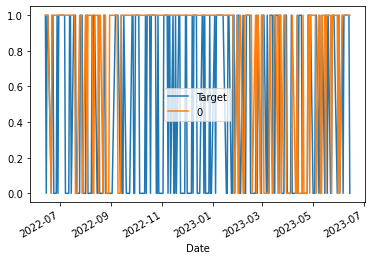

In [26]:
combined.plot()

In [29]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

def backtest(data, model, predictors, start=252, step=45):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = pd.DataFrame(predict(train, test, predictors, model))
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions, ignore_index=True)

predictions = backtest(vgt, model, predictors)
predictions["Predictions"].value_counts()

1    746
0    625
Name: Predictions, dtype: int64

In [30]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.552152
0    0.447848
Name: Target, dtype: float64

In [31]:
horizons = [2,7,45,72,90,200,340,720]
new_predictors = []

for horizon in horizons:
    rolling_avgs = vgt.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    vgt[ratio_column] = vgt["Close"] / rolling_avgs["Close"]
    
    trend_column = f"Trend_{horizon}"
    vgt[trend_column] = vgt.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [32]:
vgt = vgt.dropna()
vgt

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Tomorrow,Target,...,Close_Ratio_72,Trend_72,Close_Ratio_90,Trend_90,Close_Ratio_200,Trend_200,Close_Ratio_340,Trend_340,Close_Ratio_720,Trend_720
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-12 00:00:00-05:00,223.603013,224.872766,223.108671,224.116730,386700,0.0,0.0,0.0,224.620728,1,...,1.069745,39.0,1.067362,49.0,1.114914,118.0,1.171056,195.0,1.330097,426.0
2019-11-13 00:00:00-05:00,223.157107,224.766113,223.147419,224.620728,298200,0.0,0.0,0.0,224.349350,0,...,1.070818,40.0,1.068801,49.0,1.115977,118.0,1.172868,195.0,1.331891,426.0
2019-11-14 00:00:00-05:00,223.816244,224.446269,223.224983,224.349350,450700,0.0,0.0,0.0,226.220032,1,...,1.067619,40.0,1.066656,48.0,1.113206,117.0,1.170619,195.0,1.329093,425.0
2019-11-15 00:00:00-05:00,225.822624,226.229719,225.211988,226.220032,320200,0.0,0.0,0.0,226.753159,1,...,1.074679,40.0,1.074625,48.0,1.121038,117.0,1.179563,195.0,1.338969,425.0
2019-11-18 00:00:00-05:00,226.113431,227.160254,225.260460,226.753159,342000,0.0,0.0,0.0,227.499466,1,...,1.075431,40.0,1.076296,48.0,1.122292,117.0,1.181512,196.0,1.340914,425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-07 00:00:00-04:00,422.510010,425.529999,415.380005,416.239990,560900,0.0,0.0,0.0,420.429993,1,...,1.094138,36.0,1.105665,44.0,1.186114,95.0,1.159487,163.0,1.138898,378.0
2023-06-08 00:00:00-04:00,416.470001,421.140015,416.470001,420.429993,247700,0.0,0.0,0.0,422.179993,1,...,1.102325,37.0,1.114296,45.0,1.197158,96.0,1.171134,163.0,1.149752,378.0
2023-06-09 00:00:00-04:00,422.690002,426.519989,420.709991,422.179993,720000,0.0,0.0,0.0,430.989990,1,...,1.104082,37.0,1.116549,45.0,1.201198,97.0,1.175983,163.0,1.153924,378.0


In [33]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=100, random_state = 1) 

In [34]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .5] = 1
    preds[preds < .5] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [35]:
predictions = backtest(vgt, model, new_predictors)

In [36]:
predictions["Predictions"].value_counts()

1.0    452
0.0    198
Name: Predictions, dtype: int64

In [37]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5287610619469026